In [1]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '/content/data (4).csv'

In [5]:
df = pd.read_csv(path)
df

,Регион,"Бюджет СРФ, руб","Бюджет МО, руб",Кол-во грантов,"Бюджет грантов, руб","Численность молодeжи, задействованной в программных мероприятиях по направлению","Количество детских и молодeжных общественных объединений, работающих по данному",Округ
0,Алтайский край,5.983805e+07,1.564407e+07,61.0,3171474.0,594079.0,3516.0,СФО
1,Амурская область,5.962150e+06,1.567251e+07,17.0,1386050.0,456394.0,1525.0,ДФО
2,Архангельская область,2.486161e+08,9.823117e+06,169.0,27632933.0,469633.0,7098.0,СЗФО
3,Астраханская область,2.339994e+07,1.677035e+07,20.0,4718038.0,574441.0,1556.0,ЮФО
4,Белгородская область,2.048965e+06,4.101663e+07,58.0,5594414.0,481844.0,3421.0,ЦФО
...,...,...,...,...,...,...,...,...
80,Чеченская Республика,0.000000e+00,0.000000e+00,0.0,0.0,553385.0,384.0,СКФО
81,Чувашская Республика,1.702230e+07,3.295534e+06,22.0,7907091.0,472379.0,1563.0,ПФО
82,Чукотский автономный округ,6.939846e+07,4.000000e+05,22.0,69798455.0,2082.0,27.0,ДФО
83,Ямало-Ненецкий автономный округ,3.217584e+08,3.472443e+08,202.0,58783008.0,499957.0,1988.0,УФО


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Регион                                                                            85 non-null     object 
 1   Бюджет СРФ, руб                                                                   85 non-null     float64
 2   Бюджет МО, руб                                                                    85 non-null     float64
 3   Кол-во грантов                                                                    85 non-null     float64
 4   Бюджет грантов, руб                                                               85 non-null     float64
 5   Численность молодeжи, задействованной в программных мероприятиях по направлению   85 non-null     float64
 6   Колич

In [22]:
df=df.drop_duplicates()

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
  print(df.isna().sum())

Регион                                                                              0
Бюджет СРФ, руб                                                                     0
Бюджет МО, руб                                                                      0
Кол-во грантов                                                                      0
Бюджет грантов, руб                                                                 0
Численность молодeжи, задействованной в программных мероприятиях по направлению     0
Количество детских и молодeжных общественных объединений, работающих по данному     0
Округ                                                                               0
dtype: int64


In [ ]:
df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'Id'], axis=1,inplace=True)

In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
  print(df.isna().sum())

Регион                                                                              0
Бюджет СРФ, руб                                                                     0
Бюджет МО, руб                                                                      0
Кол-во грантов                                                                      0
Бюджет грантов, руб                                                                 0
Численность молодeжи, задействованной в программных мероприятиях по направлению     0
Количество детских и молодeжных общественных объединений, работающих по данному     0
Округ                                                                               0
dtype: int64


In [ ]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
for i in df.columns[df.isna().any()].tolist():
  df[f'{i}'] = df[f'{i}'].fillna(df[df[f'{i}'].notna()][f'{i}'].mode()[0])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Columns: 165 entries, Unnamed: 0 to Округ
dtypes: float64(162), int64(1), object(2)
memory usage: 110.2+ KB


In [25]:
text_features = []
numeric_features = []
for i in df.columns.to_list():
  if df[f'{i}'].dtype == 'object':
     text_features.append(i)
  else:
    numeric_features.append(i)

#Работа с текстовыми фичами

In [ ]:
from sklearn import preprocessing
arr_le = []
for i in text_features:
  le = preprocessing.LabelEncoder()
  df[[i]] = df[[i]].apply(lambda col: le.fit_transform(col))
  #print(le.classes_)
  arr_le.append(le)

In [34]:
df

,Регион,"Бюджет СРФ, руб","Бюджет МО, руб",Кол-во грантов,"Бюджет грантов, руб","Численность молодeжи, задействованной в программных мероприятиях по направлению","Количество детских и молодeжных общественных объединений, работающих по данному",Округ
0,Алтайский край,6.875868e+07,1.954719e+07,70.0,3396959.0,721924.0,4194.0,СФО
1,Амурская область,7.032150e+06,2.120007e+07,19.0,1631750.0,504915.0,1864.0,ДФО
2,Архангельская область,3.783671e+08,1.246667e+07,240.0,38519129.0,555090.0,9522.0,СЗФО
3,Астраханская область,2.785076e+07,1.999023e+07,30.0,6083109.0,669960.0,2144.0,ЮФО
4,Белгородская область,2.048965e+06,4.766076e+07,66.0,6599414.0,574214.0,3860.0,ЦФО
...,...,...,...,...,...,...,...,...
80,Чеченская Республика,0.000000e+00,0.000000e+00,0.0,0.0,647884.0,394.0,СКФО
81,Чувашская Республика,1.798970e+07,4.163746e+06,29.0,9952171.0,613267.0,2058.0,ПФО
82,Чукотский автономный округ,7.419846e+07,4.000000e+05,29.0,74598455.0,2396.0,38.0,ДФО
83,Ямало-Ненецкий автономный округ,4.036997e+08,4.006488e+08,259.0,77188482.0,530431.0,2783.0,УФО


In [ ]:
len(numeric_features)

37

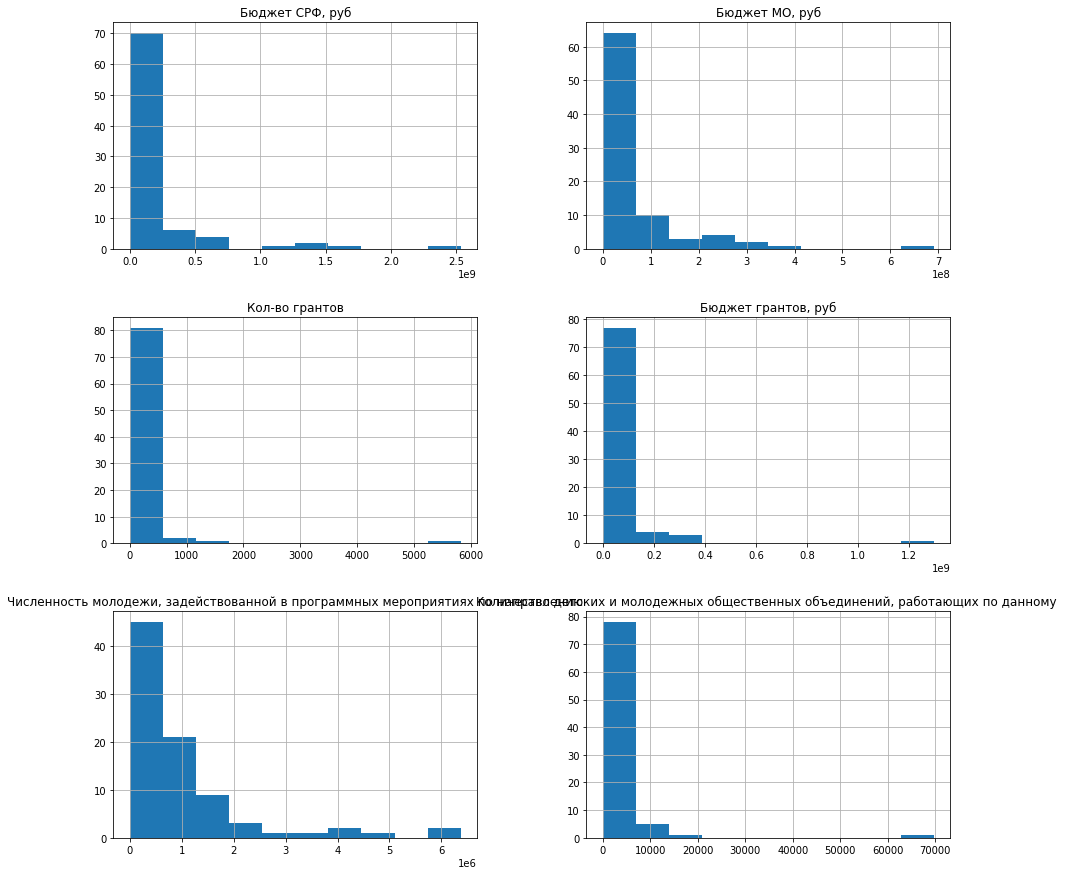

In [26]:
df_numbers = df[numeric_features]
df_numbers.hist(figsize=[15, 15])
plt.show()

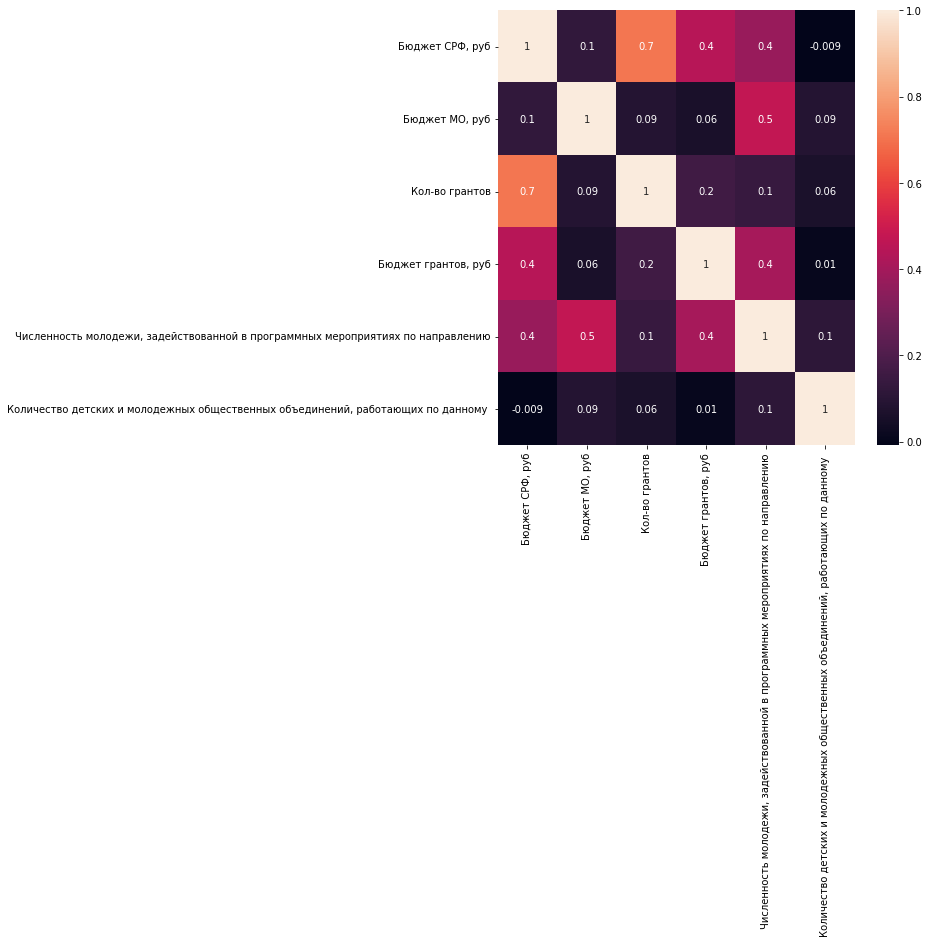

In [7]:
corr = df.corr() 
plt.figure(figsize=(8, 8))

sns.heatmap(corr, annot = True, fmt='.1g')

In [8]:
target = 'Численность молодeжи, задействованной в программных мероприятиях по направлению'

In [9]:
X = df.drop(labels=[target,'Регион','Округ'], axis=1)
y = df[target]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

##Нормализация

только числовые фичи

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_train, y_train = sm.fit_resample(X_train, y_train)

1.LinerRegression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
clf = LinearRegression(positive = True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
mean_absolute_error(y_test, y_pred)

490865.85261251184

In [73]:
np.sum(np.abs(y_test-y_pred)/17)

490865.85261251184

In [15]:
y_pred

array([ 990869.68566469,  522002.99173259,  433349.23618514,
        949981.26775011,  553765.34369848,  538186.01500102,
        405395.54235386,  368477.55242864,  584933.08628636,
       3098750.01863996, 2205426.04811441,  394414.82104676,
        720866.77343832,  564645.29863775,  520080.02101261,
        673550.97591622, 1048552.59457908])

In [74]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

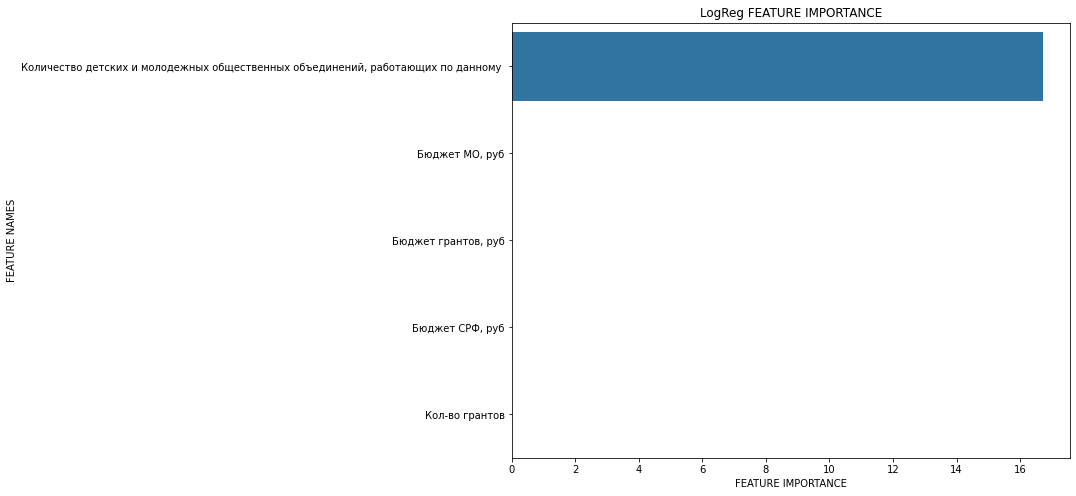

In [75]:
plot_feature_importance(clf.coef_,X_train.columns,'LogReg')

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def all_score(model,X_test,y_test):
  y_pred = model.predict(X_test)
  score_df = pd.DataFrame()
  data = {'Metrics': ['MSE', 'RMSE', 'MAE', 'R^2'],
          'Score': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False),
                    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)]} 
 
  df = pd.DataFrame(data)
  return df

In [19]:
df_score = all_score(clf,X_test_scal,y_test)
df_score

,Metrics,Score
0,MSE,1.744498e+12
1,RMSE,1.320794e+06
2,MAE,7.823696e+05
3,R^2,-3.074745e-01


2.DecisionTreeRegressor


In [56]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Without normalization: ',mean_absolute_error(y_test, y_pred))
model = DecisionTreeRegressor()
model.fit(X_train_scal, y_train)
y_pred = model.predict(X_test_scal)
print('With normalization: ',mean_absolute_error(y_test, y_pred))

Without normalization:  874270.5882352941
With normalization:  837095.6470588235


In [22]:
best_tree_score = model.score(X_test_scal,y_test)

In [23]:
best_tree_score

-0.3127590615344784

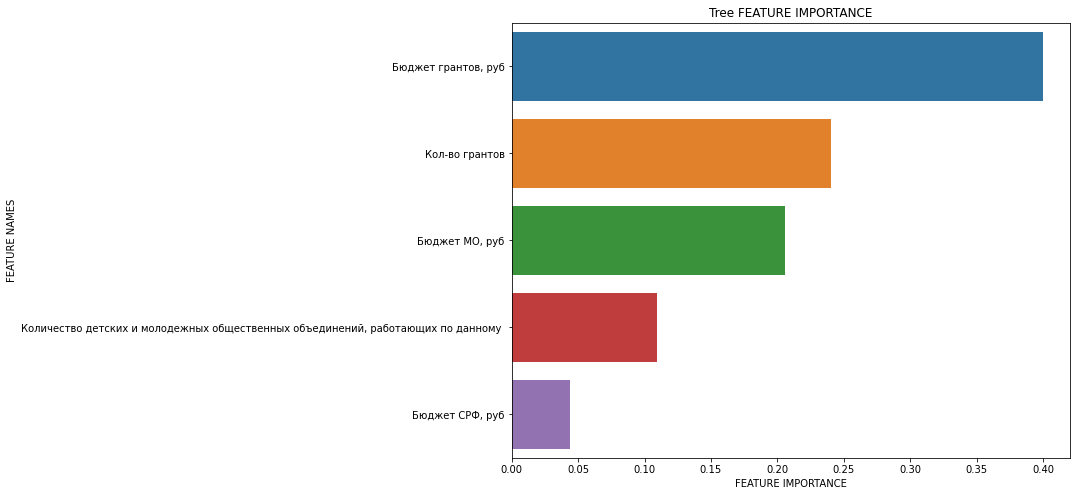

In [24]:
plot_feature_importance(model.feature_importances_,X_train.columns,'Tree')

In [25]:
df_score = all_score(model,X_test_scal,y_test)
df_score

,Metrics,Score
0,MSE,1.751549e+12
1,RMSE,1.323461e+06
2,MAE,8.309223e+05
3,R^2,-3.127591e-01


##CatBoost

In [26]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 14.7 MB/s eta 0:00:00


In [29]:
from catboost import CatBoostClassifier
from catboost import Pool

def fit_model(train_pool, validation_pool, **kwargs):
    model = CatBoostClassifier(
        iterations=10000,
        eval_metric='RMSE',#'MultiClass',
        use_best_model= True,
        #task_type='GPU'
    )

    return model.fit(
        train_pool,
        eval_set=validation_pool,
        verbose=100,
    )

train_pool = Pool(X_train, y_train)
validation_pool = Pool(X_test, y_test)

print('Train dataset shape: {}\n'.format(train_pool.shape))

model = fit_model(train_pool, validation_pool)
y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred)

Train dataset shape: (68, 5)



CatBoostError: ignored

In [30]:
train_pool = Pool(X_train_scal, y_train)
validation_pool = Pool(X_test_scal, y_test)

In [31]:
from catboost import CatBoostRegressor
from catboost import Pool

def fit_model(train_pool, validation_pool, **kwargs):
    model = CatBoostRegressor(
        iterations=10000,
        loss_function='RMSE',
        use_best_model= True
    )

    return model.fit(
        train_pool,
        eval_set=validation_pool,
        verbose=1000,
    )

In [32]:
train_pool = Pool(X_train_scal, y_train
                  )

validation_pool = Pool(
    X_test_scal, y_train
)

print('Train dataset shape: {}\n'.format(train_pool.shape))

model = fit_model(train_pool, validation_pool)

CatBoostError: ignored

In [33]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

3283497483426.8237

In [34]:
cat = CatBoostRegressor()

In [35]:
parameters = {'depth'         : [4,5,6,7,8,9],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10,20,50,60,90,100,150,200,500,1000]
              }

In [36]:
Grid_CBC = GridSearchCV(estimator=cat, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train_scal, y_train)

0:	learn: 825454.5554416	total: 46.6ms	remaining: 6.95s
1:	learn: 814006.2232250	total: 47.7ms	remaining: 3.53s
2:	learn: 804633.7650385	total: 48.2ms	remaining: 2.36s
3:	learn: 794962.8747616	total: 48.8ms	remaining: 1.78s
4:	learn: 785136.1825155	total: 49.3ms	remaining: 1.43s
5:	learn: 775502.3222753	total: 49.8ms	remaining: 1.2s
6:	learn: 767238.1981036	total: 50.3ms	remaining: 1.03s
7:	learn: 756804.3923766	total: 50.8ms	remaining: 902ms
8:	learn: 745953.0345404	total: 51.3ms	remaining: 804ms
9:	learn: 736745.8968388	total: 51.8ms	remaining: 725ms
10:	learn: 727268.5675706	total: 52.3ms	remaining: 661ms
11:	learn: 718447.3676362	total: 52.8ms	remaining: 607ms
12:	learn: 710251.6939246	total: 53.3ms	remaining: 562ms
13:	learn: 701758.6727035	total: 53.8ms	remaining: 523ms
14:	learn: 694277.3954900	total: 54.3ms	remaining: 489ms
15:	learn: 685634.7873101	total: 54.8ms	remaining: 459ms
16:	learn: 678118.1407199	total: 55.3ms	remaining: 433ms
17:	learn: 671432.8290512	total: 55.8ms	re

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fb1fd266e50>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9],
                         'iterations': [10, 20, 50, 60, 90, 100, 150, 200, 500,
                                        1000],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [37]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.2358830846045461

 The best parameters across ALL searched params:
 {'depth': 5, 'iterations': 150, 'learning_rate': 0.04}


In [38]:
import plotly.express as px

In [39]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    print(feature_importance)
    print(feature_names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    

    fi_df.sort_values(by=['feature_importance'], ascending=True,inplace=True)

    fig = px.bar(
        data_frame = fi_df,
        y = 'feature_names',
        x = 'feature_importance',
        barmode = 'group'
    )
    return fig

In [40]:
plot_feature_importance(Grid_CBC.best_estimator_.feature_importances_,X_train.columns,'CatBoost')

[15.24905223 25.63748124 13.32143107 28.8864013  16.90563416]
['Бюджет СРФ, руб' 'Бюджет МО, руб' 'Кол-во грантов' 'Бюджет грантов, руб'
 'Количество детских и молодeжных общественных объединений, работающих по данному ']


In [51]:
y_pred = Grid_CBC.predict(X_test_scal)
#mean_squared_error(y_test, y_pred)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

692977.4117540766

In [52]:
692977.4117540766/20

34648.87058770383

In [54]:
np.abs(y_test-y_pred)/20

78      1584.214805
0      13202.314102
68      3307.662769
22    190775.496345
12      9935.353672
82     21737.713198
10      7394.857865
18      9994.639269
4      10588.939958
66    106157.922273
40     16944.150280
47     26805.207602
35     19691.648995
72     25211.334441
55     35978.696475
54     29682.037056
33     60038.610885
Name: Численность молодeжи, задействованной в программных мероприятиях по направлению, dtype: float64

In [43]:
y_pred

array([ 966182.70390676,  858125.282045  ,  370710.74461306,
        543766.07309091,  643749.07344294,  436836.26396024,
        218201.15730878,  199892.78538139,  693622.79916948,
       1020850.55454257, 1173063.994398  ,  210091.84796689,
        879002.02010429,  895229.68881985,  915259.92950189,
       1027579.741119  ,  868995.7823068 ])

Optimal threshold: 0.421


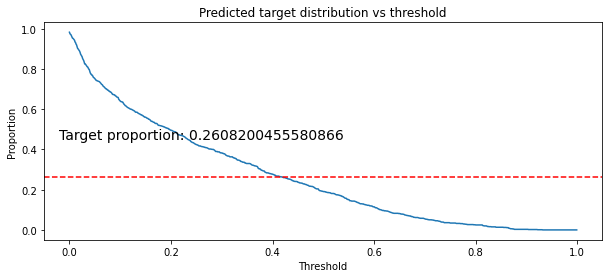

In [ ]:
# Proportion of predicted positive (transported) classes
def preds_prop(preds_arr, thresh):
    pred_classes=(preds_arr>=thresh).astype(int)
    return pred_classes.sum()/len(pred_classes)

# Plot proportions across a range of thresholds
def plot_preds_prop(preds_arr):
    # Array of thresholds
    T_array=np.arange(0,1,0.001)
    
    # Calculate proportions
    prop=np.zeros(len(T_array))
    for i, T in enumerate(T_array):
        prop[i]=preds_prop(preds_arr, T)
        
    # Plot proportions
    plt.figure(figsize=(10,4))
    plt.plot(T_array, prop)
    target_prop=  1374 / (3894+1374)    # Experiment with this value
    plt.axhline(y=target_prop, color='r', linestyle='--')
    plt.text(-0.02,0.45,f'Target proportion: {target_prop}', fontsize=14)
    plt.title('Predicted target distribution vs threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Proportion')
    
    # Find optimal threshold (the one that leads to the proportion being closest to target_prop)
    T_opt=T_array[np.abs(prop-target_prop).argmin()]
    print('Optimal threshold:', T_opt)
    return T_opt
    
T_opt=plot_preds_prop(y_pred)

In [ ]:
preds_tuned=(y_pred>=T_opt).astype(int)

In [ ]:
roc_auc_score(y_test, preds_tuned)

0.7564569961489089

In [ ]:
df_score = all_score(model,X_test_scal,y_test)
df_score

,Metrics,Score
0,MSE,7.914381e+08
1,RMSE,2.813251e+04
2,MAE,1.494835e+04
3,R^2,8.921951e-01


##LassoCV

In [57]:
from sklearn.linear_model import LassoCV
model_l = LassoCV()
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
print('Without normalization: ',mean_absolute_error(y_test, y_pred))
model_l.fit(X_train_scal, y_train)
y_pred = model_l.predict(X_test_scal)
print('With normalization: ',mean_absolute_error(y_test, y_pred))

Without normalization:  703507.1787445399
With normalization:  557216.1473843461


In [ ]:
model_l.score(X_test_scal,y_test)

0.8173238122784918

In [ ]:
df_score = all_score(model_l,X_test_scal,y_test)
df_score

,Metrics,Score
0,MSE,1.341097e+09
1,RMSE,3.662100e+04
2,MAE,2.223282e+04
3,R^2,8.173238e-01


##RidgeCV

In [79]:
from sklearn.linear_model import RidgeCV
model_r = RidgeCV()
model_r.fit(X_train, y_train)
y_pred = model_r.predict(X_test)
print('Without normalization: ',mean_absolute_error(y_test, y_pred))
model_r_n = RidgeCV()
model_r_n.fit(X_train_scal, y_train)
y_pred = model_r_n.predict(X_test_scal)
print('With normalization: ',mean_absolute_error(y_test, y_pred))

Without normalization:  83221083.61677632
With normalization:  535453.5043738984


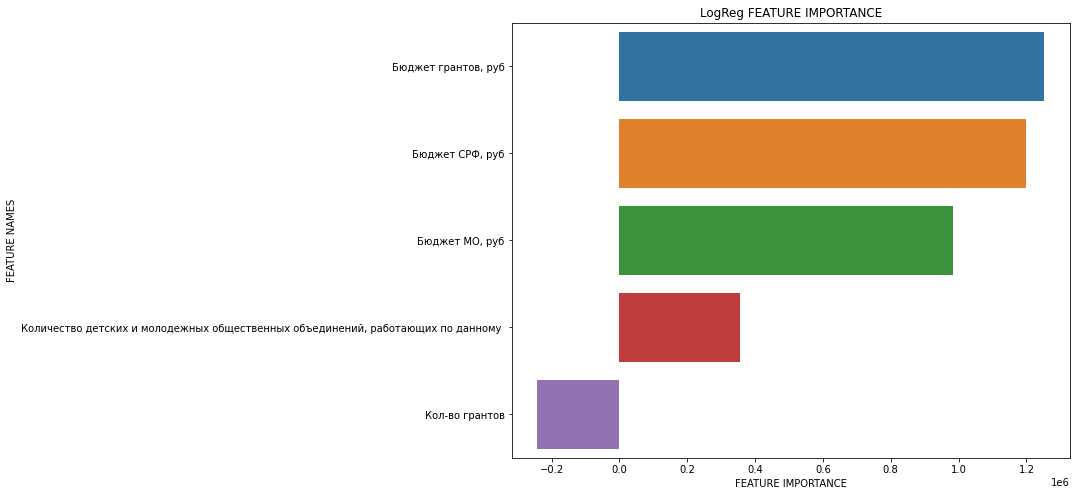

In [80]:
plot_feature_importance(model_r_n.coef_,X_train.columns,'LogReg')

In [ ]:
df_score = all_score(model_r,X_test_scal,y_test)
df_score

,Metrics,Score
0,MSE,1.359118e+09
1,RMSE,3.686622e+04
2,MAE,2.184256e+04
3,R^2,8.148691e-01


##ElasticNetCV

In [60]:
from sklearn.linear_model import ElasticNetCV
model_e = ElasticNetCV()
model_e.fit(X_train, y_train)
y_pred = model_e.predict(X_test)
print('Without normalization: ',mean_absolute_error(y_test, y_pred))
model_e_n = ElasticNetCV()
model_e_n.fit(X_train_scal, y_train)
y_pred = model_e_n.predict(X_test_scal)
print('With normalization: ',mean_absolute_error(y_test, y_pred))

Without normalization:  703509.4968016795
With normalization:  786888.8131525612


In [ ]:
model_e.score(X_test_scal,y_test)

0.0390695035798696

In [ ]:
df_score = all_score(model_e,X_test_scal,y_test)
df_score

,Metrics,Score
0,MSE,7.054567e+09
1,RMSE,8.399147e+04
2,MAE,5.808726e+04
3,R^2,3.906950e-02


##Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

In [63]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Without normalization: ',mean_absolute_error(y_test, y_pred))
rf_n = RandomForestRegressor(random_state=42)
rf_n.fit(X_train_scal, y_train)
y_pred = rf_n.predict(X_test_scal)
print('With normalization: ',mean_absolute_error(y_test, y_pred))

Without normalization:  609238.3247058825
With normalization:  603805.4358823529


In [ ]:
rf.score(X_test_scal,y_test)

0.863992398017542

In [ ]:
df_score = all_score(rf,X_test_scal,y_test)
df_score

,Metrics,Score
0,MSE,9.984850e+08
1,RMSE,3.159881e+04
2,MAE,1.797942e+04
3,R^2,8.639924e-01


##Support Vector Regressor

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [65]:
svr = SVR()#C = 20, epsilon= 0.008, gamma=0.0003
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('Without normalization: ',mean_absolute_error(y_test, y_pred))
svr_n = SVR()
svr_n.fit(X_train_scal, y_train)
y_pred = svr_n.predict(X_test_scal)
print('With normalization: ',mean_absolute_error(y_test, y_pred))

Without normalization:  749048.3042226629
With normalization:  749046.7535065474


In [ ]:
svr.score(X_test_scal,y_test)

-0.032930815160266524

In [ ]:
df_score = all_score(svr,X_test_scal,y_test)
df_score

,Metrics,Score
0,MSE,7.583149e+09
1,RMSE,8.708128e+04
2,MAE,5.735019e+04
3,R^2,-3.293082e-02


##Light Gradient Boosting Regressor

In [66]:
lgbm = LGBMRegressor(n_estimators=10000, objective='regression',random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print('Without normalization: ',mean_absolute_error(y_test, y_pred))
lgbm_n = LGBMRegressor(n_estimators=10000, objective='regression',random_state=42)
lgbm_n.fit(X_train_scal, y_train)
y_pred = lgbm_n.predict(X_test_scal)
print('With normalization: ',mean_absolute_error(y_test, y_pred))

Without normalization:  1093087.1596041773
With normalization:  1093087.1596041773


In [ ]:
lgbm.score(X_test_scal,y_test)

0.8546709705662172

In [ ]:
df_score = all_score(lgbm,X_test_scal,y_test)
df_score

,Metrics,Score
0,MSE,1.066917e+09
1,RMSE,3.266370e+04
2,MAE,1.748184e+04
3,R^2,8.546710e-01


##GradientBoostingRegressor

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
model_RFR = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 8, n_estimators=2000, subsample=0.5)
model_RFR.fit(X_train, y_train)
y_pred = model_RFR.predict(X_test)
print('Without normalization: ',mean_absolute_error(y_test, y_pred))
model_RFR_n = LGBMRegressor(n_estimators=10000, objective='regression',random_state=42)
model_RFR_n.fit(X_train_scal, y_train)
y_pred = model_RFR_n.predict(X_test_scal)
print('With normalization: ',mean_absolute_error(y_test, y_pred))

Without normalization:  728263.9306769134
With normalization:  1093087.1596041773


In [ ]:
model_RFR.score(X_test_scal,y_test)

0.8854913528684403

In [ ]:
df_score = all_score(model_RFR,X_test_scal,y_test)
df_score

,Metrics,Score
0,MSE,8.406528e+08
1,RMSE,2.899401e+04
2,MAE,1.548035e+04
3,R^2,8.854914e-01


In [ ]:
def final_model(X):
  return np.abs((model_e.predict(X)+model_r.predict(X)+model_l.predict(X)+model.predict(X))/4)

In [ ]:
0.055550/(0.057822+0.055550)

0.4899798892142681

In [ ]:
model_RFR = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 8, n_estimators=2000, subsample=0.5)


model_RFR.fit(X_scal,y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, n_estimators=2000,
                          subsample=0.5)

# Запить результатов

In [ ]:
test_df = pd.read_csv("/content/test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
test_df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'Id'], axis=1,inplace=True)
#test_df.drop('FireplaceQu', axis = 1, inplace = True)

In [ ]:
for i in test_df.columns[test_df.isna().any()].tolist():
  test_df[f'{i}'] = test_df[f'{i}'].fillna(test_df[test_df[f'{i}'].notna()][f'{i}'].mode()[0])

In [ ]:
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [ ]:
for i in range(len(text_features)):
  test_df[text_features[i]] = arr_le[i].transform(test_df[text_features[i]])#test_df[text_features[i]].apply(lambda col: arr_le[i].transform(col))

In [ ]:
#X = scaler.transform(X)

In [ ]:
pred =Grid_CBC.predict(test_df)#final_model(X)

In [ ]:
pred

array([121713.0561888 , 163124.35920335, 186534.22099719, ...,
       175222.56345597, 122933.69318129, 228383.42802808])

In [ ]:
len(pred)

1459

In [ ]:
sub_result = pd.read_csv("/content/sample_submission.csv")
print(len(sub_result['Id']))
sub_result.iloc[:,1] = pred
sub_result.head(5)
sub_result.to_csv("submission_HousePrice_cat.csv", index=False)

1459
